# 03 - Correlation analysis

This notebook investigates correlation patterns between brain‑volume features and severity indices using correlation matrices, heatmaps, and statistical tests. Based on these results, the next step will be to examine potential multivariate interactions across diagnostic groups.


In [1]:
import sys
from pathlib import Path

project_root = Path(__file__).parent.parent if "__file__" in globals() else Path("..").resolve()
sys.path.append(str(project_root))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from src.analysis import compute_correlation_matrix, run_manova
from src.config import brain_cols, severity_cols, activity_cols
from src.visualization import plot_correlation_matrix, plot_p_values_matrix


In [2]:
# Path
project_root = Path(__file__).parent.parent if "__file__" in globals() else Path("..").resolve()

tables_dir = project_root / "reports" / "tables"
figures_dir = project_root / "reports" / "figures"


In [3]:
# Load  processed dataset
DATA_PATH = Path("../data/processed/nacc_alzheimers_dataset_processed.csv")
df = pd.read_csv(DATA_PATH)

print("Processed dataset loaded. Shape:", df.shape)


Processed dataset loaded. Shape: (2700, 57)


## Correlation patterns

In [4]:
# Compute
correlation_df, p_values_df = compute_correlation_matrix(df, brain_cols, severity_cols)

# Show results
display(correlation_df.head(5))
display(p_values_df.head(5))


,delsev,hallsev,agitsev,depdsev,anxsev,elatsev,apasev,disnsev,irrsev,motsev,nitesev,appsev
csfvol,0.039798,0.085865,0.085372,0.048674,0.099624,0.022198,0.187123,0.072820,0.114767,0.071513,0.102445,0.090560
frcort,-0.085578,-0.065522,-0.080285,-0.086754,-0.052307,-0.008346,-0.051549,-0.061465,-0.034565,-0.065170,-0.045597,-0.060895
lparcort,-0.101771,-0.079625,-0.099063,-0.096353,-0.071314,-0.019556,-0.065399,-0.051037,-0.046583,-0.065440,-0.047112,-0.079695
rparcort,-0.092068,-0.076040,-0.087261,-0.091521,-0.067921,-0.006385,-0.082677,-0.040010,-0.043253,-0.066892,-0.048123,-0.063286
ltempcor,-0.139664,-0.073789,-0.096193,-0.089533,-0.100931,-0.078135,-0.108214,-0.089800,-0.061499,-0.096542,-0.081631,-0.105357


,delsev,hallsev,agitsev,depdsev,anxsev,elatsev,apasev,disnsev,irrsev,motsev,nitesev,appsev
csfvol,3.865609e-02,0.000008,8.908833e-06,1.142170e-02,2.135678e-07,0.248885,1.066780e-22,0.000152,2.224606e-09,2.000393e-04,9.566298e-08,2.438952e-06
frcort,8.471817e-06,0.000658,2.959500e-05,6.353202e-06,6.556284e-03,0.664684,7.381424e-03,0.001397,7.253025e-02,7.031660e-04,1.781691e-02,1.547268e-03
lparcort,1.161405e-07,0.000034,2.499361e-07,5.275520e-07,2.084196e-04,0.309724,6.731481e-04,0.007990,1.548937e-02,6.678401e-04,1.435594e-02,3.386967e-05
rparcort,1.651734e-06,0.000077,5.604000e-06,1.903811e-06,4.128636e-04,0.740158,1.697122e-05,0.037632,2.460687e-02,5.049849e-04,1.238986e-02,1.001167e-03
ltempcor,3.110167e-13,0.000124,5.510908e-07,3.169820e-06,1.476057e-07,0.000048,1.731340e-08,0.000003,1.387980e-03,5.011243e-07,2.168317e-05,4.081737e-08


In [5]:
# Save
correlation_df.to_csv(os.path.join(tables_dir, "correlation_matrix.csv"), index=True)
p_values_df.to_csv(os.path.join(tables_dir, "p_values_matrix.csv"), index=True)

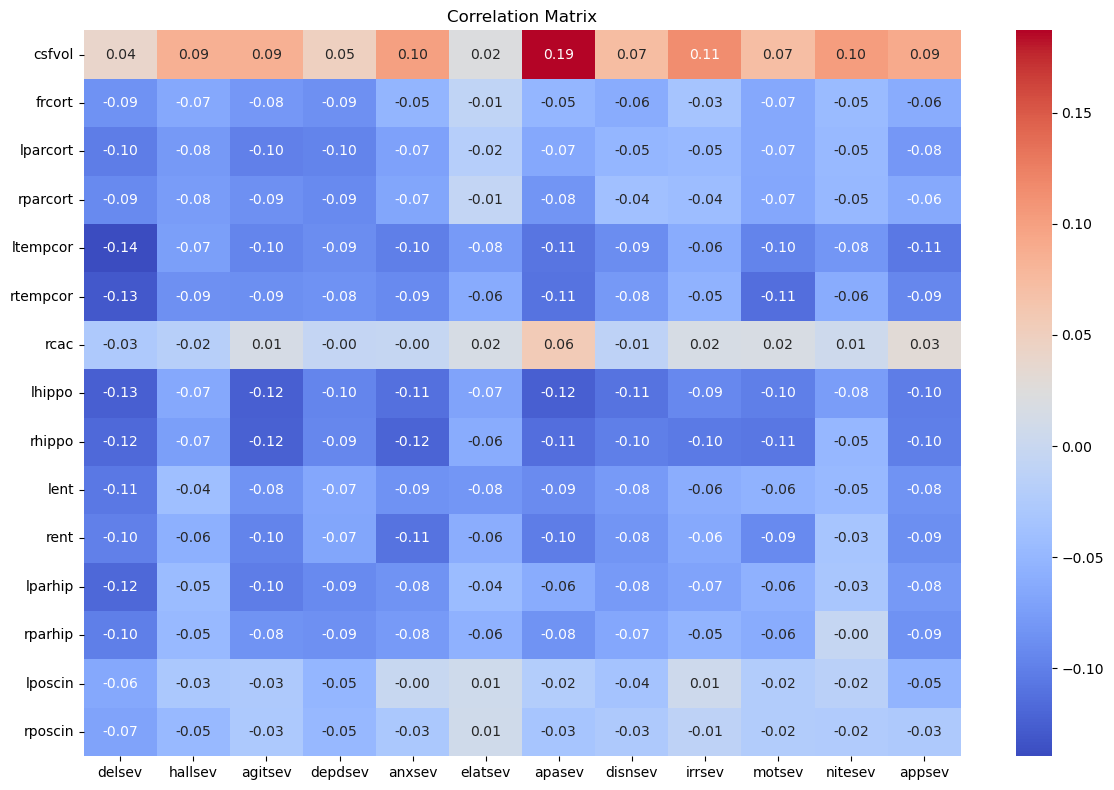

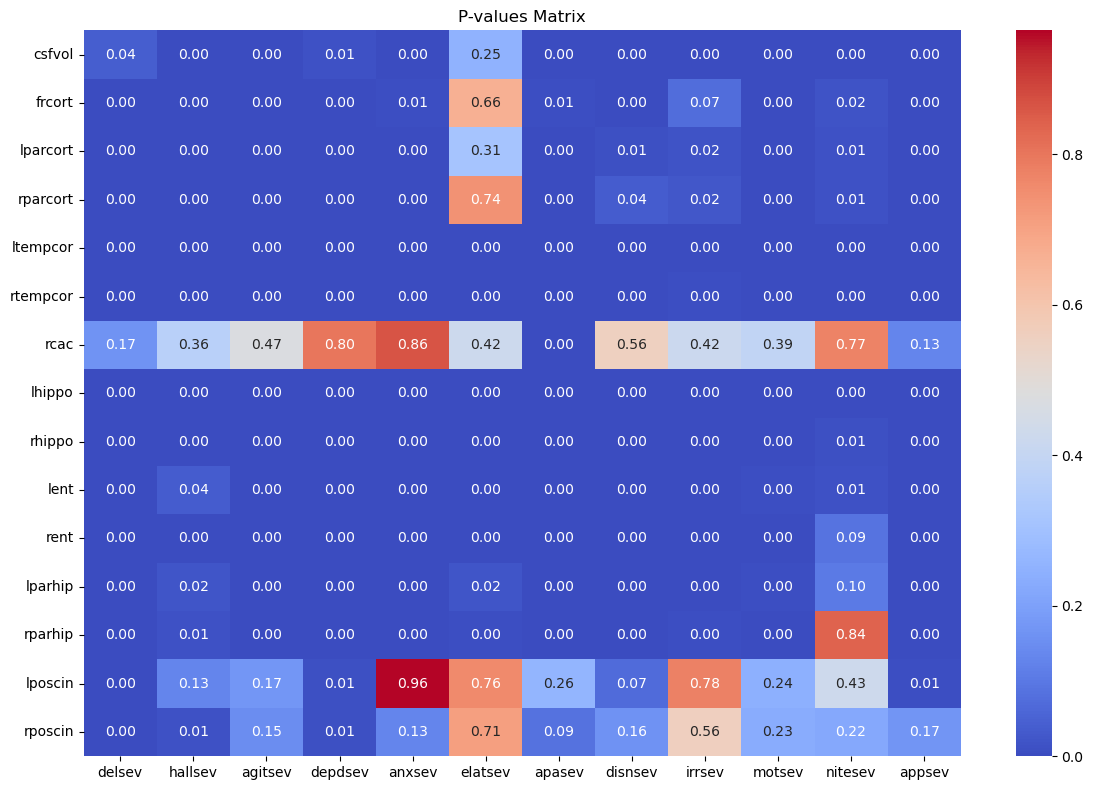

In [6]:
# Visualization
plot_correlation_matrix(
    correlation_df,
    title="Correlation Matrix",
    save_path=os.path.join(figures_dir, "correlation_matrix.png")
)

plot_p_values_matrix(
    p_values_df,
    title="P-values Matrix",
    save_path=os.path.join(figures_dir, "p_values_matrix.png")
)


- Several brain‑volume features show statistically significant correlations with specific severity indices, although effect sizes remain small.
- Other associations are weak or non‑significant, indicating that some relationships may arise by chance.
- Overall, the correlations suggest limited linear associations that are **not sufficient for predictive modelling**, consistent with previous results.

**Note**: These findings motivate a multivariate approach to examine whether more complex interactions emerge across diagnostic groups.

## Complex interactions

In [7]:
# MANOVA 1: Severity + Daily Activities
dependent_columns1 = severity_cols + activity_cols
manova1, mv_results1 = run_manova(df, dependent_columns1, 'diagnosis')

print("MANOVA: Severity Indexs + Daily Activities")
print(manova1.mv_test())


MANOVA: Severity Indexs + Daily Activities
                   Multivariate linear model
                                                                
----------------------------------------------------------------
        Intercept        Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.8919 22.0000 2677.0000 14.7507 0.0000
          Pillai's trace 0.1081 22.0000 2677.0000 14.7507 0.0000
  Hotelling-Lawley trace 0.1212 22.0000 2677.0000 14.7507 0.0000
     Roy's greatest root 0.1212 22.0000 2677.0000 14.7507 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       diagnosis        Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.4387 22.0000 2677.0000 155.6722 0.0000
  

In [8]:
# Save
for effect, effect_res in mv_results1.items():
    df_csv = effect_res['stat']
    file_path = os.path.join(tables_dir, f"manova_severity_activities_{effect}.csv")
    df_csv.to_csv(file_path, index=True)


In [9]:
# MANOVA 2: Brain Volumes + Daily Activities
dependent_columns2 = brain_cols + activity_cols
manova2, mv_results2 = run_manova(df, dependent_columns2, 'diagnosis')

print("MANOVA: Brain Volumes + Daily Activities")
print(manova2.mv_test())


MANOVA: Brain Volumes + Daily Activities
                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0163 25.0000 2674.0000 6470.7501 0.0000
         Pillai's trace  0.9837 25.0000 2674.0000 6470.7501 0.0000
 Hotelling-Lawley trace 60.4969 25.0000 2674.0000 6470.7501 0.0000
    Roy's greatest root 60.4969 25.0000 2674.0000 6470.7501 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
         diagnosis        Value   Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.3923 25.0000 2

In [10]:
# Save
for effect, effect_res in mv_results2.items():
    df_csv = effect_res['stat']
    file_path = os.path.join(tables_dir, f"manova_brain_activities_{effect}.csv")
    df_csv.to_csv(file_path, index=True)


- Brain‑volume measures show the strongest multivariate effect across diagnostic groups (F = 6.47e3, p = 0.0).
- Daily‑living activities also present a significant diagnostic effect (F = 155.67, p = 0.0).
- Severity indices show a smaller but still significant effect (F = 14.75, p = 0.0).


## Conclusions

Diagnosis has a significant multivariate influence on all dependent variable groups.
